In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re #https://www.w3schools.com/python/python_regex.asp pour "time"
from datetime import datetime as dt
%matplotlib inline
from scipy import stats
from scipy.stats import bartlett, ks_2samp, kstest, ttest_ind, shapiro, ttest_1samp, normaltest, kruskal, levene

In [2]:
#affichage des versions des librairies
!python --version
print('\n'.join(f'{m.__name__} - {m.__version__}'
for m in globals().values() 
if getattr(m, '__version__', None)))

Python 3.9.12
numpy - 1.21.5
pandas - 1.4.2
seaborn - 0.11.2
re - 2.2.1


In [3]:
import os
os.chdir('c:\\Users\\Matthieu\\Documents\\DAN-P6-donnees')  # détermination du répertoire courant

In [4]:
#Chargement des fichiers csv
customers = pd.read_csv('customers.csv')
products = pd.read_csv('products.csv')
transactions = pd.read_csv('transactions.csv')
pd.options.display.float_format = '{:,.2f}'.format

### I/-Exploration des jeux de données  

#### I/-A/ Valeurs apparentes et manquantes  

In [5]:
#Affichage d'info, head et describe pour le même dataframe à la suite.
def analysis_df_start(df_input):
    display(df_input.info())
    display(df_input.head(5))
    display(df_input.describe(include="all"))

analysis_df_start(customers)
analysis_df_start(products)
analysis_df_start(transactions)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


None

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


,client_id,sex,birth
count,8623,8623,"8,623.00"
unique,8623,2,NaN
top,c_4410,f,NaN
freq,1,4491,NaN
mean,NaN,NaN,"1,978.28"
std,NaN,NaN,16.92
min,NaN,NaN,"1,929.00"
25%,NaN,NaN,"1,966.00"
50%,NaN,NaN,"1,979.00"
75%,NaN,NaN,"1,992.00"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


None

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


,id_prod,price,categ
count,3287,"3,287.00","3,287.00"
unique,3287,NaN,NaN
top,0_1421,NaN,NaN
freq,1,NaN,NaN
mean,NaN,21.86,0.37
std,NaN,29.85,0.62
min,NaN,-1.00,0.00
25%,NaN,6.99,0.00
50%,NaN,13.06,0.00
75%,NaN,22.99,1.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


None

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


,id_prod,date,session_id,client_id
count,679532,679532,679532,679532
unique,3267,679371,342316,8602
top,1_369,test_2021-03-01 02:30:02.237413,s_0,c_1609
freq,2252,13,200,25488


Commentaire:  
- customers décrit pour chacun des 8,623 clients : son année de naissance, son sexe et son identifiant.   
- products décrit pour chacun des 3,287 produits : son prix, sa catégorie et son identifiant  
- transactions décrit pour chacun des 679,532 achats : sa date, l'identifiant de session d'achat,  
l'identifiant de produit et client qui y correspond.  

In [6]:
print("Il y a",(customers.isna().sum().sum()),"valeur manquante dans 'customers'"",",(transactions.isna().sum().sum()),"valeur manquante dans 'transactions'""et",(products.isna().sum().sum()),"valeur manquante dans 'products'.")

Il y a 0 valeur manquante dans 'customers', 0 valeur manquante dans 'transactions'et 0 valeur manquante dans 'products'.


#### I/-B/-Doublons, valeurs aberrantes, clés primaires par jeu de données

##### I/-B/-1-Dataset 'customers'

In [7]:
print("Il y a",(customers.duplicated().sum().sum()),"doublon dans 'customers'")

Il y a 0 doublon dans 'customers'


In [8]:
OutlierCusto = customers.sort_values(by='client_id', ascending=False)
OutlierCusto.head(5)
#Dans le fichier "customers" il y a deux "client_id" contenant "ct" ce qui correspond à des valeurs "tests"
#(cf. résultat de 'transactions.loc[transactions.duplicated(keep=False),:]').

,client_id,sex,birth
8494,ct_1,m,2001
2735,ct_0,f,2001
7358,c_999,m,1964
2145,c_998,m,2001
94,c_997,f,1994


In [9]:
#suppression de 'ct_1' et 'ct_0' pour établir un fichier "customers1".
customers1 = customers[(customers['client_id'] != 'ct_1') & (customers['client_id'] != 'ct_0')]
customers1.shape
#customers1 =  8 621 rows versus customers = 8 623 rows

(8621, 3)

##### I/-B/-2-Dataset 'products'

In [10]:
print("Il y a",(products.duplicated().sum().sum()),"doublon dans 'products'")

Il y a 0 doublon dans 'products'


In [11]:
#En repartant du describe, on observe que 'products' contient la valeur minimale aberrante de -1 pour les prix.
#Création du Df "OutlierPrices" pour voir qu'il y a une valeur aberrante. 
OutlierPrices= products.sort_values(by='price', ascending=True)
display(products.sort_values(by='price', ascending=True).head(5))

,id_prod,price,categ
731,T_0,-1.00,0
2355,0_202,0.62,0
2272,0_528,0.62,0
370,0_120,0.66,0
1211,0_1844,0.77,0


In [12]:
# Get names of indexes for which column has value -1
indexNames = products[products['price'] == -1].index
# Delete this row index from dataFrame
products1 = products.drop(indexNames)
#source: https://www.delftstack.com/fr/howto/python-pandas/how-to-delete-dataframe-row-in-pandas-based-on-column-value/
products1.info()
#"products1" = 3286 lignes versus "products" = 3287 lignes.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3286 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3286 non-null   object 
 1   price    3286 non-null   float64
 2   categ    3286 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 102.7+ KB


##### I/-B/-3-Dataset 'transactions' : traitement de valeurs tests

In [13]:
#Il y a des valeurs tests dans 'transactions'
display(transactions.sort_values(by='id_prod', ascending=False))

,id_prod,date,session_id,client_id
195616,T_0,test_2021-03-01 02:30:02.237442,s_0,ct_0
238625,T_0,test_2021-03-01 02:30:02.237434,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
459137,T_0,test_2021-03-01 02:30:02.237413,s_0,ct_0
379625,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_0
...,...,...,...,...
446356,0_0,2021-04-26 05:45:15.292902,s_25899,c_6535
130393,0_0,2022-03-20 09:13:31.176751,s_181767,c_4182
130285,0_0,2023-01-03 05:20:26.396092,s_321224,c_1605
314096,0_0,2022-01-18 22:42:40.556983,s_151854,c_412


In [14]:
#suppression des lignes étant des tests
transactions1 = transactions[transactions['id_prod'] !='T_0']

In [15]:
transactions1 = transactions1.drop_duplicates()
print("Il y a",(len(transactions1)),"lignes dans 'transactions1' contre 679 532 lignes dans 'transactions'")

Il y a 679332 lignes dans 'transactions1' contre 679 532 lignes dans 'transactions'


In [16]:
print("Il y a",(transactions1.duplicated().sum().sum()),"doublon dans 'transactions1'")

Il y a 0 doublon dans 'transactions1'


#### I/-C/-Jointures et clés primaires   

##### I/-C/-1-Clés primaires avant jointure et jointure

In [17]:
print(customers1.nunique())
#avec autant de lignes uniques que celles du df, 'client_id'= clé primaire de 'customers1'.
print(transactions1.nunique())
#avec autant de lignes uniques (679,332) que celles du df "transactions1", la colonne 'date' est la clé primaire de transactions1.
print(products1.nunique())
#avec autant de lignes uniques que celles du df, 'id_prod'= clé primaire de 'products1'.

client_id    8621
sex             2
birth          76
dtype: int64
id_prod         3266
date          679332
session_id    342315
client_id       8600
dtype: int64
id_prod    3286
price      1454
categ         3
dtype: int64


Explication des Clés primaires :  
-pour "products1" : id_prod. Les deux autres variables ne sont pas uniques dans ce df.  
-pour "customers1" : client_id. Les deux autres variables ne sont pas uniques dans ce df.  
-pour "transactions1" : "date" car le même "client_id" peut faire plusieurs achats sur une même "session_id" mais à chaque fois à une date unique.  
Illustation : un client  "c_103" peut acheter deux produits au cours de la même session "s_211425" mais à une date unique.  

In [18]:
df_fin = transactions1.merge(products1, how='left', on='id_prod').merge(customers1, how='left', on='client_id')

##### I/-C/-2-Clé primaire

In [19]:
print("Il y a",(df_fin.duplicated().sum().sum()),"doublon dans 'df_fin'")

Il y a 0 doublon dans 'df_fin'


In [20]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679331
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id_prod     679332 non-null  object 
 1   date        679332 non-null  object 
 2   session_id  679332 non-null  object 
 3   client_id   679332 non-null  object 
 4   price       679111 non-null  float64
 5   categ       679111 non-null  float64
 6   sex         679332 non-null  object 
 7   birth       679332 non-null  int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 46.6+ MB


In [21]:
print(df_fin.nunique())
#source : https://thispointer.com/pandas-get-unique-values-in-single-or-multiple-columns-of-a-dataframe-in-python/
#avec autant de lignes uniques (679,332) que celles de 'df_fin', 'date'= clé primaire de "df_fin"

id_prod         3266
date          679332
session_id    342315
client_id       8600
price           1442
categ              3
sex                2
birth             76
dtype: int64


In [22]:
#Création d'une clé artificielle 'id_transaction'. Cela permet d'avoir une clé unique face au risque de dates similaires dans de prochaines transactions.
df_fin['id_transaction'] = df_fin.index

##### I/-C/-3-Valeurs manquantes

##### I/-C/-3-a) "clients_id" sans transaction [contrôle hors df final]

In [23]:
NonClients = customers1.merge(transactions1, how='left', on='client_id')
NonClients.isna().sum()
#Constat : Il y a 21 clients présents dans customers1 mais non présents dans transactions1. 
#Analyse : Ces clients n'ont pas acheté de produit durant une session alors qu'ils ont un "client_id".

client_id      0
sex            0
birth          0
id_prod       21
date          21
session_id    21
dtype: int64

##### I/-C/-3-b) produits sans transaction [contrôle hors df final]

In [24]:
prodSansTrans = products1.merge(transactions1, how='left', on='id_prod')
prodSansTrans.isna().sum()
#Constat : Il y a 21 produits présents dans products1 mais non présents dans transactions1. 
#Analyse : Ces produits sont dans le catalogue mais n'ont pas l'objet d'une transaction durant la période considérée.

id_prod        0
price          0
categ          0
date          21
session_id    21
client_id     21
dtype: int64

##### I/-C/-3-c) "id_prod" 0_2245

In [25]:
df_fin.isna().sum()
#Dimensions du df final = Rows: 679,332 et Columns: 8
#221 NA dans la colonne 7 'price' et dans la colonne 8 'categorie'

id_prod             0
date                0
session_id          0
client_id           0
price             221
categ             221
sex                 0
birth               0
id_transaction      0
dtype: int64

In [26]:
df_catNA = df_fin[df_fin['categ'].isna()]

In [27]:
df_catNA.groupby(['id_prod']).count()

,date,session_id,client_id,price,categ,sex,birth,id_transaction
id_prod,,,,,,,,
0_2245,221,221,221,0,0,221,221,221


Création d'un df avec les lignes avec ces valeurs manquantes  
Trouvons la source de ce décalage. Dans "df_fin" prenons la ligne avec pour "id_prod" : "0_2245" et pour "session_id" : "s_272266".  
L'id_prod "0_2245" se trouve dans le df "transactions1" mais ne se trouve pas dans "products1".  
On voit qu'il n'y a qu'un seul "id_prod". Celui qui a la valeur "0_2245".  
Pour lequel nous n'avons pas les prix et la catégorie. Toutefois, nous avons l'information de 221 transactions de cet "id_prod".  

In [28]:
transactions1[transactions1['id_prod'] == "0_2245"]

,id_prod,date,session_id,client_id
2633,0_2245,2022-09-23 07:22:38.636773,s_272266,c_4746
10106,0_2245,2022-07-23 09:24:14.133889,s_242482,c_6713
11727,0_2245,2022-12-03 03:26:35.696673,s_306338,c_5108
15675,0_2245,2021-08-16 11:33:25.481411,s_76493,c_1391
16377,0_2245,2022-07-16 05:53:01.627491,s_239078,c_7954
...,...,...,...,...
669730,0_2245,2021-08-25 09:06:03.504061,s_80395,c_131
670682,0_2245,2022-03-06 19:59:19.462288,s_175311,c_4167
671286,0_2245,2022-05-16 11:35:20.319501,s_209381,c_4453
675679,0_2245,2022-02-11 09:05:43.952857,s_163405,c_1098


### II/-Nettoyage du jeu de données  

#### II/-A/-Création du Df pour la catégorie 0

In [29]:
df_cat0 = df_fin.query('categ == 0')

#### II/-B/-Correction des valeurs manquantes dans le df_final

In [30]:
#Observation : le premier chiffre d'"id_prod" correspond au chiffre de la catégorie.
#Etant donné que l'id_prod "0_2245" a trait à la catégorie 0, on remplace les valeurs manquantes de 'price' par le prix moyen de la catégorie 0.
meanCat0 = df_cat0.price.mean()

In [31]:
print ("Le prix moyen de la catégorie 0 est",round(meanCat0, 2),"euros.")

Le prix moyen de la catégorie 0 est 10.64 euros.


Remplacement des valeurs manquantes de la colonne 'price' par le prix moyen de la catégorie 0.  
Remplacement des valeurs manquantes de la colonne 'categ' par 0.

In [32]:
df_fin['price'].fillna(meanCat0, inplace=True)
df_fin['categ'].fillna(0, inplace=True)

In [33]:
valManq = df_fin.isna().sum().sum()
print("Après nettoyage, il y a",round(valManq),"valeurs manquantes.")

Après nettoyage, il y a 0 valeurs manquantes.


#### II/-C/-Conversion de types de données et ajout de colonnes

In [34]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679331
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_prod         679332 non-null  object 
 1   date            679332 non-null  object 
 2   session_id      679332 non-null  object 
 3   client_id       679332 non-null  object 
 4   price           679332 non-null  float64
 5   categ           679332 non-null  float64
 6   sex             679332 non-null  object 
 7   birth           679332 non-null  int64  
 8   id_transaction  679332 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 51.8+ MB


In [35]:
df_fin['date'] = pd.to_datetime(df_fin['date'], format='%Y-%m-%d %H:%M:%S')

In [36]:
df_fin.dtypes

id_prod                   object
date              datetime64[ns]
session_id                object
client_id                 object
price                    float64
categ                    float64
sex                       object
birth                      int64
id_transaction             int64
dtype: object

In [37]:
df_fin['année'] = df_fin['date'].dt.year

In [38]:
df_fin['mois'] = df_fin['date'].dt.month

In [39]:
df_fin['jour'] = df_fin['date'].dt.day

In [40]:
df_fin['categ'] = df_fin['categ'].astype(int)#ligne1
df_fin['moisAnnée'] = df_fin['date'].dt.strftime('%Y-%m')#ligne2 et suivantes
df_fin['jma'] = df_fin['date'].dt.strftime('%Y-%m-%d')
df_fin['age'] = df_fin['année'] - df_fin['birth']
#transformation de date du type "objet" au type "datetime64"
#source : https://openclassrooms.com/fr/courses/7410486-nettoyez-et-analysez-votre-jeu-de-donnees/7451506-nettoyez-vos-donnees-avec-python#/id/r-7458193
#ligne1 : conversion de "categ" en entier
#ligne2 et suivantes : création des colonnes : mois, année et age

In [41]:
df_final = df_fin
print("Les dimensions de df_final sont",df_final.shape,)

Les dimensions de df_final sont (679332, 15)


In [42]:
print("Les transactions s'étallent de", str (df_final['date'].min())[:10],"au", str (df_final['date'].max())[:10])

Les transactions s'étallent de 2021-03-01 au 2023-02-28


#### II/-D/-Focus sur oct. 2021

<function matplotlib.pyplot.show(close=None, block=None)>

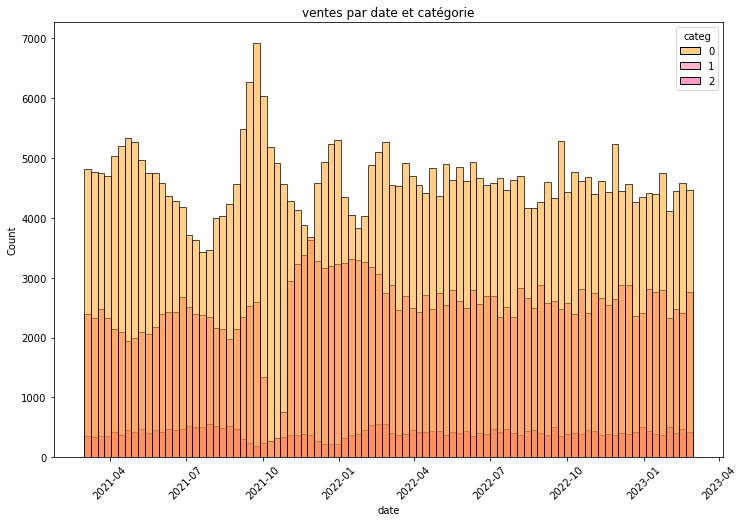

In [43]:
plt.figure(figsize=(12,8))
sns.histplot(data=df_final, x='date', hue='categ', palette=["#ff9e10", "#ff6e90", "#ff3d90"])
plt.xticks(rotation=45)
plt.title('ventes par date et catégorie')
plt.show
#source: https://encycolorpedia.com/search?q=%23ff3d90

Il y a un creux sur le mois d'octobre 2021  

In [44]:
#df_oc : df_final filtré au mois d'oct. 2021
df_oc = df_final.loc[ df_final.moisAnnée== "2021-10", ['jour', 'price','categ']]
#df_oct pivot pour  le CA par catégorie de produit par jour pour octobre 2021.
df_oct = pd.pivot_table(df_oc, index = ['jour'], columns = 'categ', values = 'price',aggfunc=np.sum)
df_oct.head(5)

categ,0,1,2
jour,,,
1,"6,950.50","7,003.79","3,104.05"
2,"7,141.01",NaN,"2,041.12"
3,"6,786.57",NaN,"2,206.48"
4,"6,554.88",NaN,"2,746.08"
5,"6,357.91",NaN,"3,032.55"


Text(0, 0.5, "Chiffre d'affaires")

<Figure size 936x432 with 0 Axes>

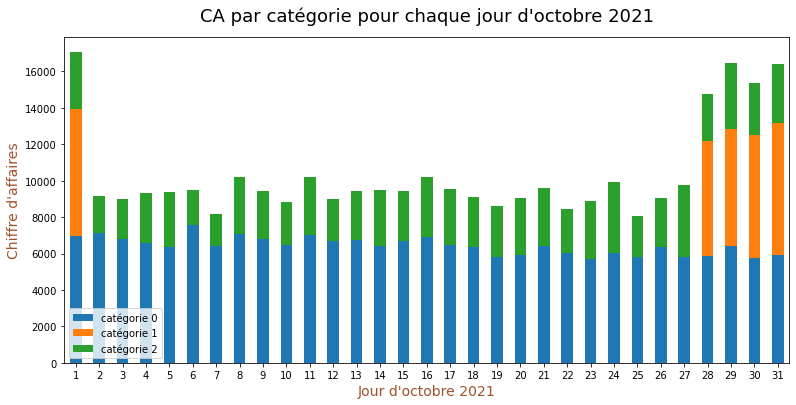

In [45]:
#CA par catégorie sous forme de diagramme en bâtons empilés pour le mois d'octobre 2021
fig = plt.figure(figsize =(13,6 ))
categories = ['catégorie 0', 'catégorie 1', 'catégorie 2']
df_oct.plot.bar(figsize=(13,6), stacked=True, rot=0)
plt.title("CA par catégorie pour chaque jour d'octobre 2021",fontsize = 18, color = 'black', y =1.03)
plt.xlabel("Jour d'octobre 2021", fontsize = 14, color = '#A0522D')
plt.legend(labels=categories, loc='lower left')
plt.ylabel("Chiffre d'affaires", fontsize = 14, color = '#A0522D')

Observation : les données pour la catégorie 1 sont manquantes du 2 au 27 octobre 2021.  
Cela pourrait venir d'un problème technique (ex. site web hors service, problème d’approvisionnement de cette catégorie, etc.).  
Ce problème doit être remonté pour voir la marge d'erreur inhérente. Décision : les données sont conservées en l'état.  

### III/-Demandes d'Antoine  

In [46]:
#'price' est renommé en 'CA'
df_final.rename(columns= {'price':'CA'}, inplace = True)

#### III/-A/- Indicateurs et graphiques autour du CA et de moyennes mobiles  

##### III/-A/-1/- Indicateurs moyennes mobiles et CA par jour 

In [47]:
#création d'un df avec date et prix
#groupement de la somme des prix pour chaque jour
df_dp = df_final[['jma','CA']]
df_dpj = df_dp.groupby('jma').sum().reset_index()
df_dpj.head(5)

,jma,CA
0,2021-03-01,"16,575.86"
1,2021-03-02,"15,497.09"
2,2021-03-03,"15,198.69"
3,2021-03-04,"15,196.07"
4,2021-03-05,"17,471.37"


Définition: Une moyenne mobile permet de lisser une série de valeurs exprimées en fonction du temps. Cela élimine les fluctuations peu significatives.  
On calcule des moyennes mobiles d'ordre 3, 4, 5, etc.  
L'ordre est le nombre de périodes (années, trimestres, mois, etc.) sur lesquelles la moyenne mobile est calculée.  
Calculer la moyenne mobile d'ordre 3 pour une série mensuelle d'une variable consiste à calculer, pour chaque mois m,  
la moyenne de cette variable sur les trois mois m-1, m et m+1.  
source : https://www.insee.fr/fr/metadonnees/definition/c2091 

In [48]:
#moyenne mobile sur 7 jours
df_dpj['moy_mobile_7'] = df_dpj['CA'].rolling(7,min_periods=1).mean()
df_dpj.head(5)

,jma,CA,moy_mobile_7
0,2021-03-01,"16,575.86","16,575.86"
1,2021-03-02,"15,497.09","16,036.47"
2,2021-03-03,"15,198.69","15,757.21"
3,2021-03-04,"15,196.07","15,616.93"
4,2021-03-05,"17,471.37","15,987.82"


In [49]:
#moyenne mobile sur 30 jours
df_dpj['moy_mobile_30'] = df_dpj['CA'].rolling(30,min_periods=1).mean()
df_dpj.head(5)

,jma,CA,moy_mobile_7,moy_mobile_30
0,2021-03-01,"16,575.86","16,575.86","16,575.86"
1,2021-03-02,"15,497.09","16,036.47","16,036.47"
2,2021-03-03,"15,198.69","15,757.21","15,757.21"
3,2021-03-04,"15,196.07","15,616.93","15,616.93"
4,2021-03-05,"17,471.37","15,987.82","15,987.82"


##### III/-A/-2/- Indicateurs moyennes mobiles et CA par mois

In [50]:
#création d'un df 'df_dpm' avec date et prix
#groupement de la somme des prix pour chaque mois
df_dpm = df_final[['moisAnnée','CA']]
df_dpm = df_dpm.groupby('moisAnnée').sum().reset_index()
#moyenne mobile sur 3 mois
df_dpm['moy_mobile_3mois'] = df_dpm['CA'].rolling(3,min_periods=1).mean()
df_dpm.head(5)

,moisAnnée,CA,moy_mobile_3mois
0,2021-03,"482,536.35","482,536.35"
1,2021-04,"476,258.23","479,397.29"
2,2021-05,"493,028.58","483,941.05"
3,2021-06,"484,163.03","484,483.28"
4,2021-07,"482,877.95","486,689.85"


##### III/-A/-3/- Visualisation des CA et moyennes mobiles par jour et par mois

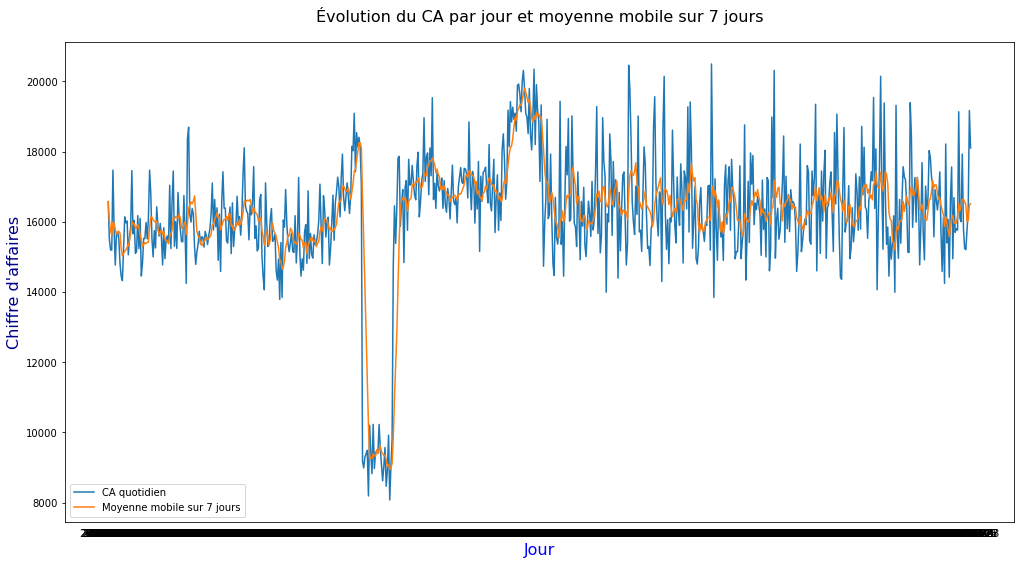

In [51]:
# Evolution du CA par jour et de la moyenne mobile sur 7 jours
plt.figure(figsize =(17,30))
ax = plt.subplot(3,1,1)
plt.plot(df_dpj.jma, df_dpj.CA,label='CA quotidien' )
plt.plot(df_dpj.jma, df_dpj.moy_mobile_7 ,label='Moyenne mobile sur 7 jours' )

plt.xlabel("Jour", fontsize = 16, color = 'blue')
plt.ylabel("Chiffre d'affaires", fontsize = 16, color = 'darkblue')
plt.title('Évolution du CA par jour et moyenne mobile sur 7 jours', fontsize = 16, color = 'black',y =1.03)
plt.legend(loc='lower left')
ax.tick_params(bottom=False)

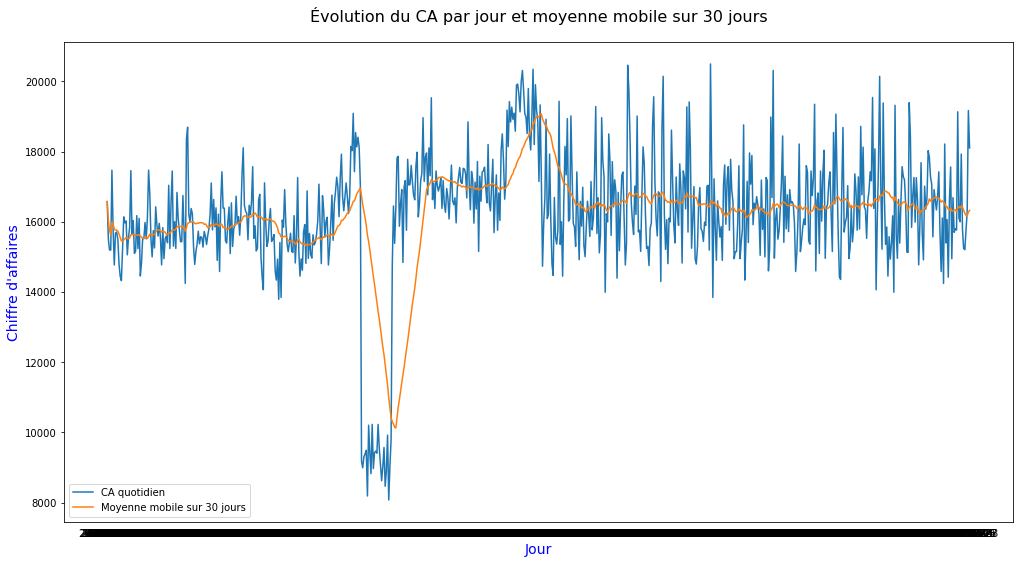

In [52]:
# Evolution du CA par jour et de la moyenne mobile sur 30 jours
plt.figure(figsize =(17,30))
ax1 = plt.subplot(3,1,1)
plt.plot(df_dpj.jma, df_dpj.CA,label='CA quotidien' )
plt.plot(df_dpj.jma, df_dpj.moy_mobile_30 ,label='Moyenne mobile sur 30 jours' )

plt.xlabel("Jour", fontsize = 14, color = 'blue')
plt.ylabel("Chiffre d'affaires", fontsize = 14, color = 'blue')
plt.title('Évolution du CA par jour et moyenne mobile sur 30 jours', fontsize = 16, color = 'black',y =1.03)
plt.legend(loc='lower left')
plt.tick_params(bottom=False)

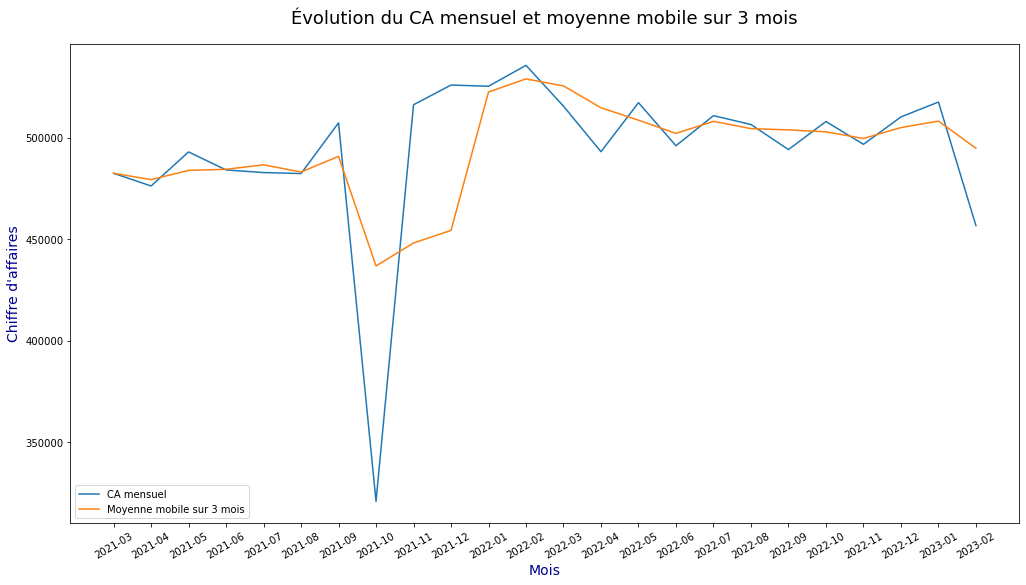

In [53]:
# Evolution du CA par mois et de la moyenne mobile sur 3 mois
plt.figure(figsize =(17,30))
ax = plt.subplot(3,1,3)
plt.plot(df_dpm.moisAnnée, df_dpm.CA,label='CA mensuel' )
plt.plot(df_dpm.moisAnnée, df_dpm.moy_mobile_3mois ,label='Moyenne mobile sur 3 mois' )

plt.xlabel("Mois", fontsize = 14, color = 'darkblue')
plt.ylabel("Chiffre d'affaires", fontsize = 14, color = 'darkblue')
plt.title('Évolution du CA mensuel et moyenne mobile sur 3 mois', fontsize = 18, color = 'black',y =1.03)
plt.legend(loc='lower left')
plt.tick_params(axis="x",labelrotation=30)

Triple commentaire concernant ces graphiques :  
1-Tendance générale : légère augmentation du CA et de la moyenne mobile entre mars-août 2021 et mars-août 2022.  

2-Fluctuations : il y a des variations de la courbe autour de la tendance générale décrite.  
Par ailleurs, il y a de fortes fluctuations des achats selon les jours (plus la période considéré est courte, plus les fluctuations sont fortes [exemple: 7 jours]).  

3-Deux ruptures : creux en octobre 2021 et léger pic par rapport à la tendance générale entre février et mars 2022.  
Source méthologique : http://www.sabbar.fr/sabbar/Methodologie/Exploitergraphiqueeco.pdf  

#### III/-B/- Calcul du CA global, nombre de ventes et transaction moyenne

In [54]:
#CA du df_final 
ca_total = round(df_final.CA.sum(),2)
print("Le chiffre d'affaires est de",ca_total,"euros.")

Le chiffre d'affaires est de 11856079.72 euros.


In [55]:
#Nombre total de session de ventes uniques
nb_vente = df_final['session_id'].nunique()
print("Le nombre de sessions de ventes uniques est de",nb_vente)

Le nombre de sessions de ventes uniques est de 342315


In [56]:
#Nombre total de produits uniques vendus
nb_prodVendu = df_final['id_prod'].nunique()
print("Le nombre de produits uniques vendus est de",nb_prodVendu)

Le nombre de produits uniques vendus est de 3266


In [57]:
#Transaction moyenne
panier_moyen = round((ca_total/ nb_vente),2)
print("Le montant de la session moyenne est de",panier_moyen," euros.")

Le montant de la session moyenne est de 34.63  euros.


In [58]:
#CA moyen obtenu par le biais d'une moy. mobile sur 7 jours
meanMoyMob7 = round(df_dpj.moy_mobile_7.mean(),2)
print("Le chiffre d'affaires quotidien moyen sur 7 jours est de",meanMoyMob7," euros.")

Le chiffre d'affaires quotidien moyen sur 7 jours est de 16236.27  euros.


In [59]:
#CA quotidien moyen obtenu par le biais d'une moy. mobile sur 1 mois.
meanMoyMob30 = round(df_dpj.moy_mobile_30.mean(),2)
print("La chiffre d'affaires quotidien moyen sur 30 jours est de",meanMoyMob30," euros.")

La chiffre d'affaires quotidien moyen sur 30 jours est de 16226.94  euros.


In [60]:
#CA mensuel moyen
Moy = round(df_dpm.CA.mean(),2)
print("Le chiffre d'affaires mensuel moyen est de",Moy," euros.")

Le chiffre d'affaires mensuel moyen est de 494003.32  euros.


In [61]:
#CA moyen obtenu par le biais d'une moy. mobile sur 3 mois.
meanMoyMob3m = round(df_dpm.moy_mobile_3mois.mean(),2)
print("La chiffre d'affaires moyen sur 3 mois est de",meanMoyMob3m," euros.")

La chiffre d'affaires moyen sur 3 mois est de 494188.69  euros.


In [62]:
#Tableau de synthèse des chiffres clés
data = [["Nombre de sessions de ventes uniques",nb_vente],["Nombre de produits uniques vendus",nb_prodVendu],["Montant de la session moyenne en €",panier_moyen],["chiffre d'affaires total en €",ca_total],
["Chiffre d'affaires quotidien moyen sur 7 jours en €",meanMoyMob7],["Chiffre d'affaires quotidien moyen sur 30 jours en €",meanMoyMob30],["Chiffre d'affaires mensuel moyen en €",Moy],
["Chiffre d'affaires moyen sur 3 mois en €",meanMoyMob3m]]
# Creation du pandas DataFrame
Synthese_ChiffresCles = pd.DataFrame(data, columns=["Aggrégat", "Valeur"])
Synthese_ChiffresCles["Valeur"] = Synthese_ChiffresCles["Valeur"].astype(int)#transformation en type entier
# head du dataframe
Synthese_ChiffresCles.head(9)
#source : ENI, velt, p.95 et https://www.geeksforgeeks.org/different-ways-to-create-pandas-dataframe/

,Aggrégat,Valeur
0,Nombre de sessions de ventes uniques,342315
1,Nombre de produits uniques vendus,3266
2,Montant de la session moyenne en €,34
3,chiffre d'affaires total en €,11856079
4,Chiffre d'affaires quotidien moyen sur 7 jours...,16236
5,Chiffre d'affaires quotidien moyen sur 30 jour...,16226
6,Chiffre d'affaires mensuel moyen en €,494003
7,Chiffre d'affaires moyen sur 3 mois en €,494188


Le chiffre d'affaires sur la période considérée augmente. Il passe de 482 536 euros en mars 2021 à 494 210 en septembre 2022.  
Il en est de même de la moyenne mobile sur 3 mois qui passe de 482 536 euros à 503 891 euros.  
Il y a rentabilité si ce CA apporte plus de résultat et d'EBITDA, voire si cette augmenation du CA est supérieure à celle de librairies concurrentes  
(benchmark possible par : https://www.pappers.fr/recherche)

#### III/-C/-CA mensuel et moyenne mobile sur 3 mois par catégorie 

In [63]:
def create_dfcat(df_input, int_input):
    df_cat = df_input.loc[df_final.categ == int_input, ["moisAnnée", "CA"]]
    df_cat = df_cat.groupby("moisAnnée").sum().reset_index()
    df_cat['moy_mobile_3mois'] = df_cat['CA'].rolling(3,min_periods=1).mean()
    print("Pour la catégorie " + str(int_input))
    display(df_cat.describe(include="all"))
    return df_cat

In [64]:
df_cat0 = create_dfcat(df_final, 0)
df_cat1 = create_dfcat(df_final, 1)
df_cat2 = create_dfcat(df_final, 2)

Pour la catégorie 0


,moisAnnée,CA,moy_mobile_3mois
count,24,24.00,24.00
unique,24,NaN,NaN
top,2021-03,NaN,NaN
freq,1,NaN,NaN
mean,NaN,"184,253.42","185,372.55"
std,NaN,"20,172.47","9,864.29"
min,NaN,"144,793.34","160,214.77"
25%,NaN,"173,364.05","182,577.16"
50%,NaN,"183,717.16","184,647.81"
75%,NaN,"194,054.32","189,040.87"


Pour la catégorie 1


,moisAnnée,CA,moy_mobile_3mois
count,24,24.00,24.00
unique,24,NaN,NaN
top,2021-03,NaN,NaN
freq,1,NaN,NaN
mean,NaN,"193,905.11","193,553.80"
std,NaN,"42,353.65","25,711.52"
min,NaN,"33,762.32","129,122.49"
25%,NaN,"188,135.99","179,977.46"
50%,NaN,"197,494.60","199,517.78"
75%,NaN,"207,390.05","202,417.29"


Pour la catégorie 2


,moisAnnée,CA,moy_mobile_3mois
count,24,24.00,24.00
unique,24,NaN,NaN
top,2021-03,NaN,NaN
freq,1,NaN,NaN
mean,NaN,"115,844.79","115,262.34"
std,NaN,"20,073.86","13,291.68"
min,NaN,"68,854.29","87,995.89"
25%,NaN,"109,463.85","107,300.36"
50%,NaN,"117,116.98","118,822.98"
75%,NaN,"126,360.65","121,033.45"


In [65]:
df_categMois = pd.pivot_table(df_final, index=['moisAnnée'], columns='categ', values='CA', aggfunc=np.sum)

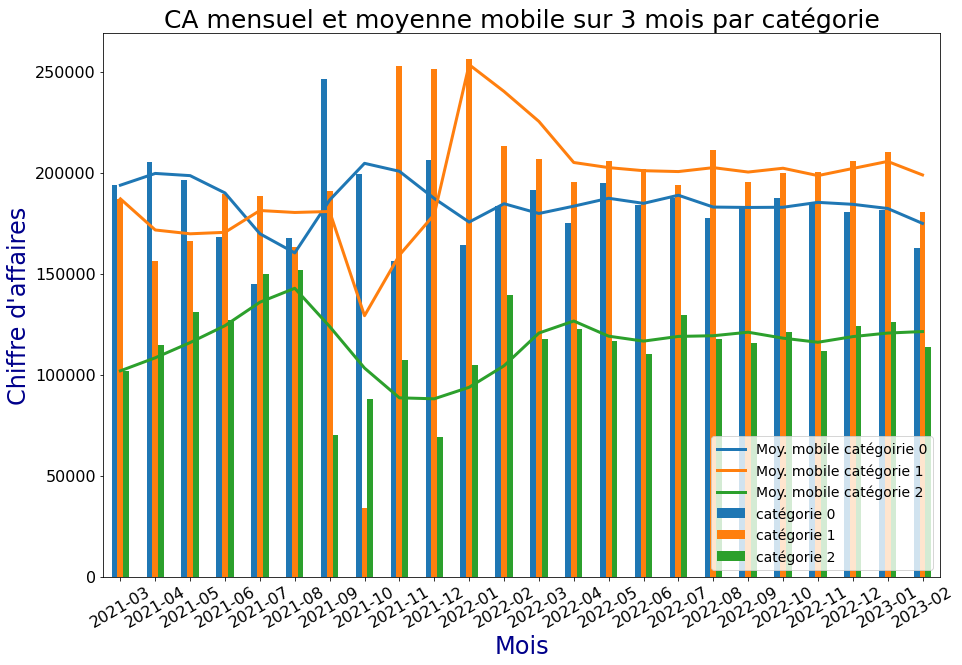

In [66]:
categories = ['Moy. mobile catégoirie 0','Moy. mobile catégorie 1', 'Moy. mobile catégorie 2','catégorie 0', 'catégorie 1', 'catégorie 2']
#CA mensuel par catégorie
df_categMois.plot(kind='bar',figsize = (15, 10))
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.title(label = 'CA mensuel et moyenne mobile sur 3 mois par catégorie',fontsize= 25, color = 'black')
plt.xlabel("Mois", fontsize = 24, color = 'darkblue')
plt.ylabel("Chiffre d'affaires", fontsize = 24, color = 'darkblue')
plt.tick_params(axis = "x", labelrotation=30)
#moyenne mobile sur 3 mois par catégorie 
plt.plot(df_cat0.moisAnnée, df_cat0.moy_mobile_3mois ,linewidth = 3)
plt.plot(df_cat1.moisAnnée, df_cat1.moy_mobile_3mois ,linewidth = 3)
plt.plot(df_cat2.moisAnnée, df_cat2.moy_mobile_3mois ,linewidth = 3)
plt.legend(labels=categories, loc='lower right', fontsize=14)


L'observation de la dynamique du CA mensuel distingue deux groupes de catégories :  
-le groupe qui a un CA mensuel moyen > à 150 000 euros composé des catégories 0 et 1  
-le groupe qui a un CA mensuel moyen < à 150 000 euros composé de la catégorie 2  
source : les "mean" des "describe" des df_cat 0, 1 et 2.

#### III/-D/-Références par catégorie, tops et flops 

##### III/-D/-1/-Répartition par catégorie : du CA total, du nbr de ventes et du prix 

In [67]:
#CALCULS

In [68]:
#proportion du CA total par catégorie
df_cat =  df_final.groupby("categ")[['CA']].sum().reset_index()
#proportion du nombre de ventes par catégorie
nbr_cat= df_final.groupby("categ")[['session_id']].count().reset_index()
#moyennes du prix par catégorie
moy_cat = df_final.groupby("categ")[['CA']].mean().reset_index()
moy_cat

,categ,CA
0,0,10.64
1,1,20.49
2,2,76.21


In [69]:
#REPRESENTATION GRAPHIQUE

Text(0, 0.5, 'Prix unitaire moyen')

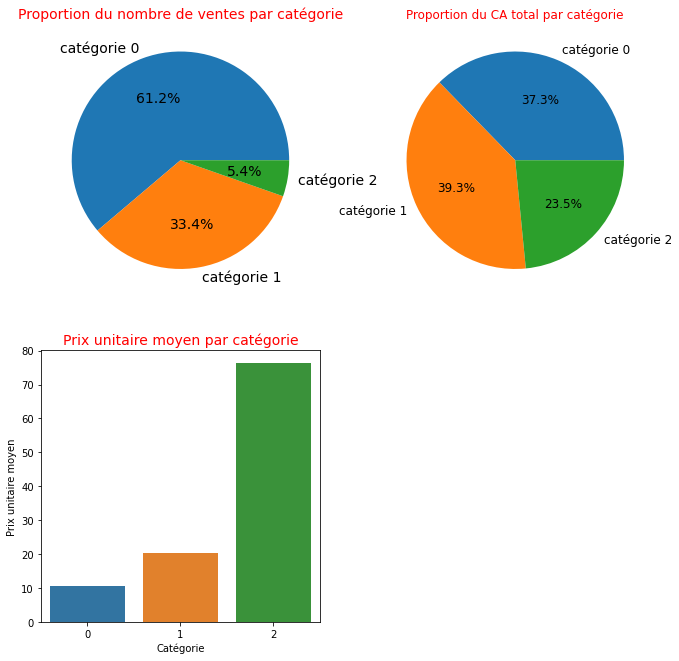

In [70]:
#set the parts du gateau et les catégories et la taille des différents graph
fig = plt.figure(figsize =(11,11))
partsGateau = ['catégorie 0', 'catégorie 1', 'catégorie 2']
#Proportion du nombre de ventes par catégorie
plt.subplot(2,2,1)
patches, l_text, p_text=plt.pie(x= nbr_cat['session_id'], labels = partsGateau, autopct='%1.1f%%')
plt.title('Proportion du nombre de ventes par catégorie', fontsize = 14, color = 'red')
for t in p_text:
    t.set_size(14)
for t in l_text:
    t.set_size(14)

#Proportion du CA total par catégorie 
plt.subplot(2,2,2)
patches, l_text, p_text=plt.pie(x= df_cat['CA'], labels = partsGateau, autopct='%1.1f%%')
plt.title('Proportion du CA total par catégorie', fontsize = 12, color = 'red')
for t in p_text:
    t.set_size(12)
for t in l_text:
    t.set_size(12)

#Prix unitaire moyen par catégorie
plt.subplot(2,2,3)
sns.barplot(data = moy_cat, x='categ', y = 'CA')
plt.title('Prix unitaire moyen par catégorie', fontsize = 14, color = 'red')
plt.xlabel('Catégorie')
plt.ylabel('Prix unitaire moyen')

Triple commentaire :  
-La catéogorie 1 a le CA total le plus élevé,  
-par contre les produits de la catégorie 0 représentent 6 ventes sur 10 soit un peu moins du double des produits de la catégorie 1,  
-la catégorie 2 dispose du prix unitaire moyen de 76.06 euros soit 3.75 fois plus que la catégorie 1.  

De ce triple commentaire découle une double observation :  
le prix moyen croît avec la catégorie. De ce fait, + la catéogorie est élévée + le nombre de ventes diminue (cf. logique de la loi de la Demande),  
pour autant le chiffre d'affaires total par ordre décroissant est : categ 1, categ 0, categ 2.  

##### III/-D/-2/-Tops et flops

##### III/-D/-2/-a/-Top CA et nombre global de ventes 

In [71]:
#top 8 du CA avec id_prod
top_ca = df_final.groupby(['id_prod'])['CA'].sum().reset_index()
top_ca = top_ca.sort_values('CA', ascending=False).head(8)
top_ca

,id_prod,CA
3097,2_159,"94,893.50"
3071,2_135,"69,334.95"
3046,2_112,"65,407.76"
3035,2_102,"60,736.78"
3153,2_209,"56,971.86"
2620,1_395,"54,356.25"
2592,1_369,"54,025.48"
3044,2_110,"53,846.25"


In [72]:
#top 8 des ventes avec id_prod
top_nbrVentes = df_final.groupby(['id_prod']).agg({'session_id':'count', 'CA':'sum'}).reset_index()
top_nbrVentes = top_nbrVentes.sort_values('session_id', ascending=False).head(8)
top_nbrVentes.rename(columns = {'session_id':'nbr_de_ventes'}, inplace = True)
top_nbrVentes.head(8)

,id_prod,nbr_de_ventes,CA
2592,1_369,2252,"54,025.48"
2645,1_417,2189,"45,947.11"
2642,1_414,2180,"51,949.40"
2734,1_498,2128,"49,731.36"
2654,1_425,2096,"35,611.04"
2630,1_403,1960,"35,260.40"
2640,1_412,1951,"32,484.15"
2641,1_413,1945,"34,990.55"


##### III/-D/-2/-b/-Top CA et nbr de ventes par catégorie

In [73]:
#top du CA total par catégorie
top_caCat = pd.pivot_table(df_final, index = ['id_prod', 'categ'], values = 'CA',aggfunc=np.sum).reset_index()
top_caCat = top_caCat.sort_values('CA', ascending=False).groupby('categ', as_index=False).head(1)
top_caCat


,id_prod,categ,CA
3097,2_159,2,"94,893.50"
2620,1_395,1,"54,356.25"
487,0_1441,0,"23,452.65"


In [74]:
#top des du décompte des ventes totales par catégorie
top_ventCat = pd.pivot_table(df_final, index = ['id_prod', 'categ'], values = 'session_id',aggfunc='count').reset_index()
top_ventCat = top_ventCat.sort_values('session_id', ascending=False).groupby('categ', as_index=False).head(1)
top_ventCat

,id_prod,categ,session_id
2592,1_369,1,2252
466,0_1422,0,1292
3035,2_102,2,1027


##### III/-D/-2/-c/-Flop CA et nombre global de ventes 

In [75]:
#flop 4 des ventes avec id_prod
flop_nbrVentes = df_final.groupby(['id_prod']).agg({'session_id':'count', 'CA':'sum'}).reset_index()
#flop_nbrVentes = flop_nbrVentes.sort_values('session_id', ascending = True)
flop_nbrVentes = flop_nbrVentes.sort_values('CA', ascending = True)
flop_nbrVentes.head(4)

,id_prod,session_id,CA
595,0_1539,1,0.99
313,0_1284,1,1.38
719,0_1653,2,1.98
1785,0_541,1,1.99


In [76]:
#flop 3 du CA total par catégorie
flop_caCat = pd.pivot_table(df_final, index = ['id_prod', 'categ'], values = 'CA',aggfunc=np.sum).reset_index()
flop_caCat = flop_caCat.sort_values('CA', ascending=True).groupby('categ', as_index=False).head(3)
flop_caCat

,id_prod,categ,CA
595,0_1539,0,0.99
313,0_1284,0,1.38
719,0_1653,0,1.98
2649,1_420,1,14.24
2432,1_224,1,19.80
2704,1_470,1,21.64
3248,2_81,2,86.99
3176,2_23,2,115.99
3264,2_98,2,149.74


In [77]:
#flop 3 des du décompte des ventes totales par catégorie
flop_ventCat = pd.pivot_table(df_final, index = ['id_prod', 'categ'], values = 'session_id',aggfunc='count').reset_index()
flop_ventCat = flop_ventCat.sort_values('session_id', ascending=True).groupby('categ', as_index=False).head(1)
flop_ventCat


,id_prod,categ,session_id
1793,0_549,0,1
3176,2_23,2,1
2629,1_402,1,2


Commentaires :  
Catégorie apportant le plus de CA = catégorie 2. Catégorie la plus vendue = catégorie 1.  
Catégorie apportant le moins de CA et de ventes = catégorie 0.  
Dans la catégorie 0 : le produit apportant le plus de CA = '0_1441', celui apportant le + de ventes = '0_1422'.  
Dans la catégorie 1 : le produit apportant le plus de CA = '1_395', celui apportant le + de ventes = '1_369'.  
Dans la catégorie 2 : le produit apportant le plus de CA = '2_159', celui apportant le + de ventes = '2_102'.  

#### III/-E/- Profils des clients [Antoine]

In [78]:
df_clients = df_final.groupby(['client_id'])[['CA']].sum().sort_values('CA', ascending=False)#groupage de "sum de CA" par 'client_id'
df_clients.rename(columns= {'CA':'CA_par_client'}, inplace = True)
df_clients['Quantité_par_client'] = df_final.groupby(['client_id'])[['id_prod']].count().sort_values('id_prod', ascending=False) #nbr d'id_prod par 'client_id'
df_clients['CA_marginal_client'] = df_clients['CA_par_client'].cumsum()#somme cumulée pour avoir le CA cumulé pour chaque client supplémentaire
df_clients.head(10)

,CA_par_client,Quantité_par_client,CA_marginal_client
client_id,,,
c_1609,"324,033.35",25488,"324,033.35"
c_4958,"289,760.34",5195,"613,793.69"
c_6714,"153,662.75",9187,"767,456.44"
c_3454,"113,669.84",6773,"881,126.28"
c_3263,"5,276.87",403,"886,403.15"
c_1570,"5,271.62",369,"891,674.77"
c_2899,"5,214.05",105,"896,888.82"
c_2140,"5,208.82",402,"902,097.64"
c_7319,"5,155.77",371,"907,253.41"


In [79]:
ca4clients = (100*(df_clients.head(4).CA_par_client.sum()))/ df_clients['CA_par_client'].sum()#(ca des 4 + grands / sum ca total)x100
print("Les 4 clients les plus importants (sur les 8600 clients totaux) représentent un chiffre d'affaires qui correspond à",round(ca4clients,1),"% le CA total, soit 696,854 euros (cf. CA marginal par client).")

Les 4 clients les plus importants (sur les 8600 clients totaux) représentent un chiffre d'affaires qui correspond à 7.4 % le CA total, soit 696,854 euros (cf. CA marginal par client).


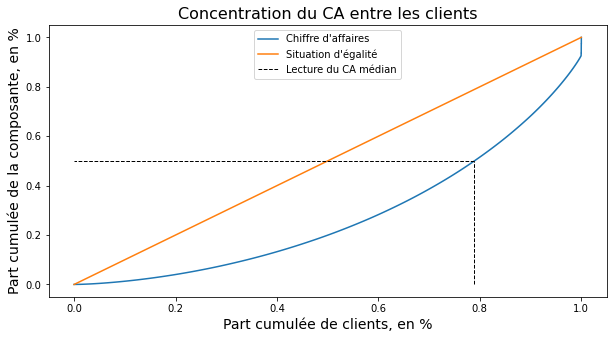

In [80]:
# Courbe de Lorenz
n_client = len(df_clients)#'n_client', nombre de clients = 8600
ca_client = df_clients.CA_par_client.values#'ca_client', ndarray = CA pour chaque client
lorenz = np.cumsum(np.sort(ca_client)) / ca_client.sum()#'lorenz' = CA par clients en effectifs cumulés croissants : axe des ordonnées
mediane = lorenz[(lorenz < 0.5)].size / lorenz.size #Calcul de l'intersection à la médiane du CA -> part cumulée de clients = 0.79
xaxis = np.linspace(0-1/n_client,1+1/n_client,len(lorenz))#ajout des abscisses à la courbe de Lorenz 
plt.figure(figsize =(10,5))#taille générale de la figure
plt.plot(xaxis,lorenz,drawstyle='steps-post',label = "Chiffre d'affaires")#légende 1
plt.plot([0,1], [0,1], label = "Situation d'égalité") #légende 2
plt.vlines(mediane, ymin=0, ymax=.5, color='black', linestyle='--', linewidth=1,label='Lecture du CA médian') #légende 3, #pointillés verticaux
plt.hlines(xmin=mediane, xmax=0, y=.5, color='black', linestyle='--', linewidth=1)#pointillés horizontaux
plt.title('Concentration du CA entre les clients', fontsize = 16, color = 'black')#titre axe 1
plt.xlabel('Part cumulée de clients, en %', fontsize=14, color = 'black')#titre axe 2
plt.ylabel('Part cumulée de la composante, en %', fontsize=14, color = 'black') #titre axe 3
plt.legend(loc='upper center', fontsize=10)#placement légende

Note de lecture : 50% du CA provient d'environ 20% des clients, une équirépartition disposerait que 50% du CA proviendrait de 50% des clients.  
Il conviendrait de savoir qui sont ces 20% de clients qui rapportent la moitié du chiffre d'affaires et qui sont ces 4 clients qui représentent 7.4 % du CA total :
sont-ils des particuliers ou des professionnels (quels professionnels : des bibliothèques? des administrations? des entreprises ?) ?

### Transition vers la partie IV/

Le sujet principal des demandes de Julie sera le client et non plus des indicateurs de rentabilité.  
Il convient alors de ne conserver que le jeu de données B to C qui sera stocké dans 'df_final'.

In [81]:
#Transformer df_fin pour n'avoir que les clients B to B
df_fin = df_final[(df_final.client_id=='c_1609')|(df_final.client_id=='c_4958')|(df_final.client_id=='c_6714')|(df_final.client_id=='c_3454')]
df_fin.describe()

,CA,categ,birth,id_transaction,année,mois,jour,age
count,"46,643.00","46,643.00","46,643.00","46,643.00","46,643.00","46,643.00","46,643.00","46,643.00"
mean,18.89,0.47,"1,978.16","338,886.51","2,021.67",6.54,15.69,43.51
std,21.18,0.64,9.10,"196,021.89",0.62,3.48,8.70,9.12
min,0.62,0.00,"1,968.00",2.00,"2,021.00",1.00,1.00,22.00
25%,8.99,0.00,"1,969.00","168,088.50","2,021.00",4.00,8.00,41.00
50%,13.99,0.00,"1,980.00","339,467.00","2,022.00",6.00,16.00,42.00
75%,19.53,1.00,"1,980.00","508,996.00","2,022.00",10.00,23.00,53.00
max,300.00,2.00,"1,999.00","679,314.00","2,023.00",12.00,31.00,55.00


In [82]:
#Observons les catégories achetées par ces 4 clients B to B
#Df BtoB avec le chiffre d'affaires par catégorie
df_BtoB = df_fin.groupby(['categ','client_id'],as_index=False)['CA'].sum() 
df_BtoB = df_BtoB.pivot(index='categ', columns=['client_id'], values=['CA'])
df_BtoB

CA                               
client_id     c_1609    c_3454     c_4958    c_6714
categ                                              
0         214,447.24 28,811.60      48.76 57,318.42
1         108,084.90 83,583.02  39,375.24 73,246.54
2           1,501.21  1,275.22 250,336.34 23,097.79

Text(0, 0.5, "Chiffre d'affaires")

<Figure size 936x432 with 0 Axes>

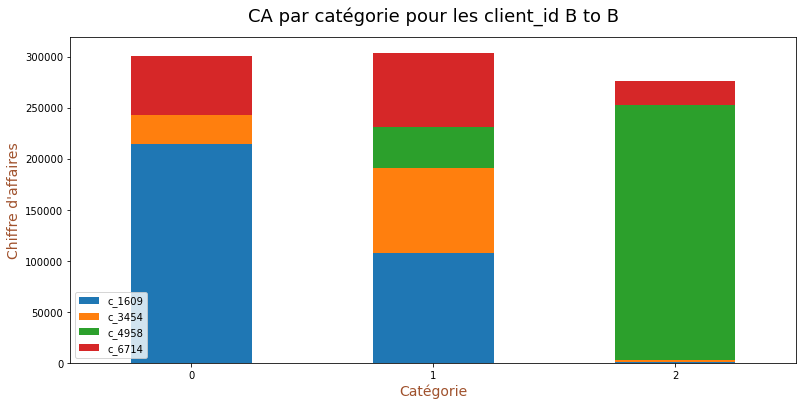

In [83]:
#CA par catégorie pour les client_id B to B 
fig = plt.figure(figsize =(13,6 ))
categories = ['catégorie 0', 'catégorie 1', 'catégorie 2']
client_id = ['c_1609',	'c_3454',	'c_4958',	'c_6714']
df_BtoB.plot.bar(figsize=(13,6), stacked=True, rot=0)
plt.title("CA par catégorie pour les client_id B to B",fontsize = 18, color = 'black', y =1.03)
plt.xlabel("Catégorie", fontsize = 14, color = '#A0522D')
plt.legend(labels=client_id, loc='lower left')
plt.ylabel("Chiffre d'affaires", fontsize = 14, color = '#A0522D')

Commentaires :  
- le client_id 'c_1609' rapporte la majorité du CA B to B de la catégorie 0,  
- le client_id 'c_1609' rapporte la plus grande part de CA B to B de la catégorie 1 qui est davantage distribué entre les quatre clients,  
- le client_id 'c_4958' rapporte environ 250 000 euros de CA pour la catégorie 2.  

Aussi, certains clients semblent avoir des habitudes de consommation marquées (ex. le client "c_1609" pour la catégorie 0 et le client "c_4958" pour la catégorie 2).  

In [84]:
#Création de df_final ne répertoriant que les B to C
df_final = df_final.drop(df_fin.index).reset_index(drop=True)

### IV/-Demandes de Julie

Déterminer si il y a corrélation entre :    
1- le genre et les catégories de produits achetés  
2- l'âge des clients et le montant total des achats  
3- l'âge des clients et la fréquence d’achat  
4- l'âge des clients et la taille du panier moyen  
5- l'âge des clients et les catégories de produits achetés  

#### IV/-A/-Analyse bivariée entre le genre et les catégories

Reformulation problématisée : le genre d'un individu influence-t-il significativement la catégorie achetée ?

##### IV/-A/-1/-Visualisation

In [85]:
#Nombre d'achats par catégorie croisé avec le genre
cate_genre = df_final.groupby(['categ','sex'],as_index=False)['id_prod'].count() 
cate_genre = cate_genre.pivot(index='categ',columns=['sex'], values=['id_prod'])
#categ en lignes et sex en colonnes
cate_genre.rename(columns={'id_prod':'ACHATS'},inplace=True)
#insertion d'une colonne 'différence' : soustraction entre achats des h et des f
cate_genre[('ACHATS', 'différence achats femme-homme par categ')]= cate_genre[('ACHATS', 'f')]-cate_genre[('ACHATS', 'm')]
#total de chaque colonne
cate_genre.loc["Total"] = cate_genre.sum()

cate_genre[('PARTS ACHATS PAR CATEG EN %', 'f')]= (cate_genre[('ACHATS', 'f')]*100) / (cate_genre[('ACHATS', 'f')]+cate_genre[('ACHATS', 'm')])
#insérer une colonne PARTS EN %_'f' et PARTS EN %_'h'
#formule exemple : (achats f 'categ0')x100 / (achats h 'categ0' + achats f 'categ0')
cate_genre[('PARTS ACHATS PAR CATEG EN %', 'm')]= (cate_genre[('ACHATS', 'm')]*100) / (cate_genre[('ACHATS', 'f')]+cate_genre[('ACHATS', 'm')])

#insérer une colonne avec les PARTS des ACHATS Non plus par CATEG mais par GENRE EN %
#formule exemple : (cate_genre[('ACHATS', 'f')]*100) / somme des achats des femmes 
cate_genre[('PARTS ACHATS PAR GENRE EN %', 'f')]= (cate_genre[('ACHATS', 'f')]*100) / 329215
cate_genre[('PARTS ACHATS PAR GENRE EN %', 'm')]= (cate_genre[('ACHATS', 'm')]*100) / 303474
cate_genre

ACHATS                                                  \
sex         f       m différence achats femme-homme par categ   
categ                                                           
0      200904  186589                                   14315   
1      111331  101017                                   10314   
2       16980   15868                                    1112   
Total  329215  303474                                   25741   

      PARTS ACHATS PAR CATEG EN %       PARTS ACHATS PAR GENRE EN %         
sex                             f     m                           f      m  
categ                                                                       
0                           51.85 48.15                       61.03  61.48  
1                           52.43 47.57                       33.82  33.29  
2                           51.69 48.31                        5.16   5.23  
Total                       52.03 47.97                      100.00 100.00

Avec un niveau de commentaire situé au niveau des achats par CATEGORIE, on observe que :  
- Les acheteurs sont majoritairement des acheteuses pour chaque catégorie. Au total, 52% des achats sont effectués par des femmes.   
- Au total, les femmes achètent 25 741 livres de plus que les hommes.  

Au niveau des achats par GENRE, on observe que les tendances d'achats sont les mêmes selon les genres avec environ :  
3 achats sur 5 qui concernent la catégorie 0, 1 achat sur 3 qui concerne la catégorie 1 et 5% des achats qui concernent la catégorie 2.  

In [86]:
# Df de synthèse pour faire les diagrammes circulaires
cate_genre_synth = df_final.groupby(['categ','sex'],as_index=False)['id_prod'].count() 
cate_genre_synth = cate_genre_synth.pivot(index='categ', columns=['sex'], values=['id_prod'])
cate_genre_synth

id_prod        
sex         f       m
categ                
0      200904  186589
1      111331  101017
2       16980   15868

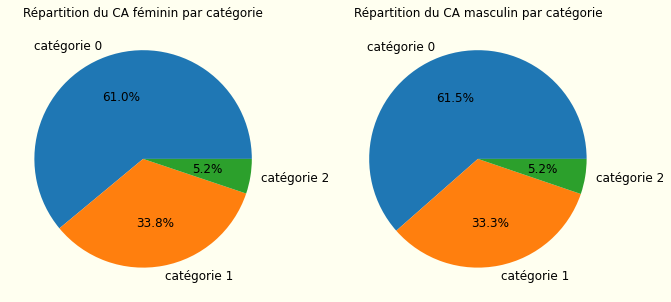

In [87]:
#set the parts du gateau et les catégories et la taille des différents graph
fig = plt.figure(figsize =(11,11), facecolor='ivory')
partsGateau = ['catégorie 0', 'catégorie 1', 'catégorie 2']

#Proportion du CA par catégorie pour les femmes 
ax1 = fig.add_subplot(2,2,1)
patches, l_text, p_text=plt.pie(x= cate_genre_synth[('id_prod', 'f')], labels = partsGateau, autopct='%1.1f%%')
plt.title('Répartition du CA féminin par catégorie', fontsize = 12, color = 'black')
for t in p_text:
    t.set_size(12)
for t in l_text:
    t.set_size(12)

#Proportion du CA par catégorie pour les hommes 
ax2 = fig.add_subplot(2,2,2)
patches, l_text, p_text=plt.pie(x= cate_genre_synth[('id_prod', 'm')], labels = partsGateau, autopct='%1.1f%%')
plt.title('Répartition du CA masculin par catégorie', fontsize = 12, color = 'black')
for t in p_text:
    t.set_size(12)
for t in l_text:
    t.set_size(12)
#Source : https://stackoverflow.com/questions/4804005/matplotlib-figure-facecolor-background-color ; McKinney p. 268

##### IV/-A/-2/-Test du $\Chi$ $^2$

Le 'genre' et les 'catégories' étant des variables qualitatives et discrètes (il ne peut y avoir une infinité de valeurs),  
il convient de les analyser avec le test du $\Chi$ $^2$ :  
Avec un risque d'erreur fixé à de 5 %, on émet les deux hypothèses suivantes:  
H0: le genre d’un client et les catégories des livres achetés sont indépendantes  
H1: le genre d’un client et les catégories des livres achetés sont corrélées  
Si la p - valeur est supérieure à 0.05, alors on retient une indépendance.

In [134]:
#Tableau de contingence
X = "sex"
Y = "categ"
cont = df_final[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len)
cont

categ,0,1,2
sex,,,
f,200904,111331,16980
m,186589,101017,15868


In [137]:
#Test du Chi2
chi2, pvalue1, degrees, expected = stats.chi2_contingency(cont)
print("La pvalue est de", pvalue1,"ce qui inférieur au risque d'erreur fixé à 0.05. Il y a une corrélation entre le genre d’un client et les catégories des livres achetés.")

La pvalue est de 4.1075985631484716e-05 ce qui inférieur au risque d'erreur fixé à 0.05. Il y a une corrélation entre le genre d’un client et les catégories des livres achetés.


#### IV/-B/-Analyse bivariée à partir de l'âge du client

##### IV/-B/-1/-Lien : âge du client et le montant total des achats

Reformulation problématisée : le montant total des achats (donc le CA) varie-t-il avec l'âge ou alors est-il constant ?

In [90]:
#df age_ca avec, par age, le nombre d'achats dans le df_final et la sum du CA
age_ca = df_final.groupby('age')['CA'].agg(['count', 'sum']).sort_values('sum').reset_index()
#nombre d'achats, CA
age_ca.rename(columns={"count":"nombre d'achats par age", "sum":"CA par age"},inplace=True)
#source : https://stackoverflow.com/questions/33750326/compute-row-average-in-pandas
age_ca.head(5)

,age,nombre d'achats par age,CA par age
0,94,23,437.77
1,93,129,"2,115.62"
2,92,196,"3,309.62"
3,91,210,"3,455.02"
4,90,243,"4,114.03"


C:\Users\Matthieu\AppData\Local\Temp\ipykernel_108244\158403716.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask=np.triu(np.ones_like(age_ca.corr(), dtype=np.bool)),


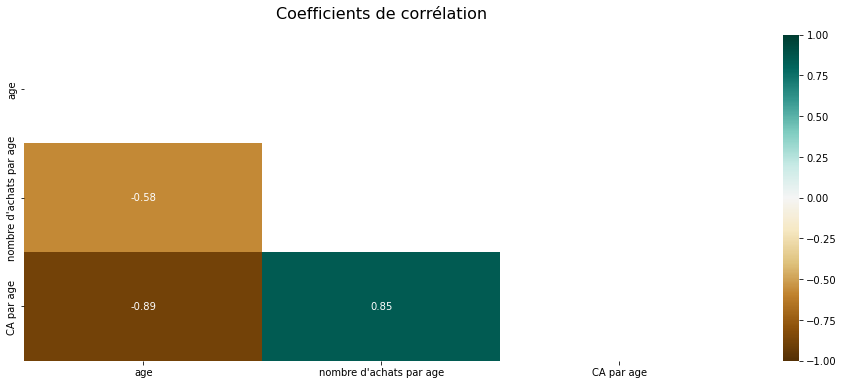

In [91]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(
    age_ca.corr(), 
    mask=np.triu(np.ones_like(age_ca.corr(), dtype=np.bool)), 
    vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Coefficients de corrélation', fontdict={'fontsize':16}, pad=16)
plt.show()
#Source : p. 350 ENI Velt

In [92]:
age_ca['CA moyen par age']=age_ca['CA par age'].mean()
age_ca['CA min par age']=age_ca['CA par age'].min()
age_ca['CA max par age']=age_ca['CA par age'].max()
age_ca['CA médian par age']=age_ca['CA par age'].median()
age_ca.head(5)

,age,nombre d'achats par age,CA par age,CA moyen par age,CA min par age,CA max par age,CA médian par age
0,94,23,437.77,"140,704.53",437.77,"384,592.43","135,763.73"
1,93,129,"2,115.62","140,704.53",437.77,"384,592.43","135,763.73"
2,92,196,"3,309.62","140,704.53",437.77,"384,592.43","135,763.73"
3,91,210,"3,455.02","140,704.53",437.77,"384,592.43","135,763.73"
4,90,243,"4,114.03","140,704.53",437.77,"384,592.43","135,763.73"


Le montant total des achats par âge représente des variables quantitatives et continues (il peut y avoir une infinité de valeurs pour le montant total des achats).  
On peut tester l’adéquation du graphique représentant le montant total des achats par âge à une loi normale à l’aide de Kolmogorov-Smirnov.  
On émet les deux hypothèses suivantes:  
H0: la distribution suit une loi normale  
H1: la distribution ne suit pas une loi normale  
Si la p - valeur est inférieure à 0.05, alors on retient H1.

In [93]:
ks_2samp(age_ca["CA par age"],list(np.random.normal(np.mean(age_ca["CA par age"]), np.std(age_ca["CA par age"]), 1000)))
#source : https://s3-eu-west-1.amazonaws.com/course.oc-static.com/courses/4525306/python_statistiques_inferentielles.html

KstestResult(statistic=0.10333333333333333, pvalue=0.39387772728214654)

Etant donné que nous avons une échantillon d'uniquement 78 valeurs, on peut compléter par un test Shapiro-Wilk et privilégier le résultat de ce dernier.

In [94]:
shapiro(age_ca["CA par age"])

ShapiroResult(statistic=0.9320079684257507, pvalue=0.0004417887539602816)

On obtient une p-valeur de Shapiro-Wilk inférieure à la probabilité critique fixée à 0.05.  
Le montant total des achats par âge ne suit pas une loi gaussienne.  

La covariance fournit le degré d'interdépendance de deux variables.  
Une covariance positive signifie que les deux variables évoluent dans le même sens.  
Une covariance négative signifie qu’elles évoluent en sens inverse.  

In [95]:
print("La covariance est de", round(np.cov(age_ca['age'], age_ca['CA par age'], ddof=0)[0][1],1),". Sur l'ensemble de la série statistique considérée, il y a ainsi une corrélation négative entre l'âge et le montant des achats.")
#sources : https://stackoverflow.com/questions/15317822/calculating-covariance-with-python-and-numpy ; https://numpy.org/doc/stable/reference/generated/numpy.cov.html

La covariance est de -2034698.7 . Sur l'ensemble de la série statistique considérée, il y a ainsi une corrélation négative entre l'âge et le montant des achats.


In [96]:
print("Le coefficient de corrélation de Pearson est de",round(stats.pearsonr(age_ca['age'], age_ca['CA par age'])[0],2),". Le coefficient est plus proche de -1 que de 0. Par conséquent, il y a une corrélation négative forte entre les deux variables.")
#Source : https://fr.acervolima.com/test-de-correlation-python-pearson-entre-deux-variables/ 

Le coefficient de corrélation de Pearson est de -0.89 . Le coefficient est plus proche de -1 que de 0. Par conséquent, il y a une corrélation négative forte entre les deux variables.


(15.0, 95.0)

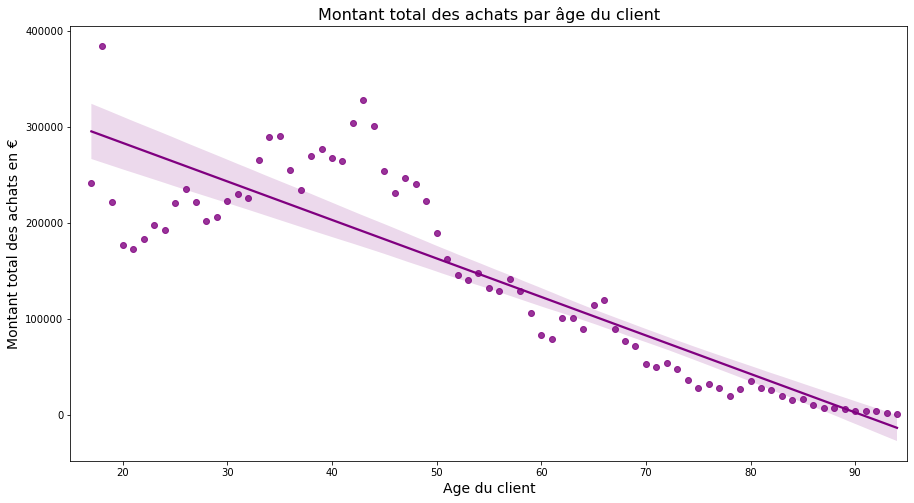

In [97]:
#Régression linéaire
plt.figure(figsize=(15, 8)) #size de la figure
sns.regplot(x='age', y='CA par age', data = age_ca, color = 'purple')#source des données et colonnes correspondantes
plt.ylabel('Montant total des achats en €', fontsize= 14, color = 'black')
plt.xlabel('Age du client', fontsize= 14, color = 'black')
plt.title("Montant total des achats par âge du client", fontsize= 16, color = 'black')
plt.xlim(15,95)# valeur min et max des abscisses

Sur l'ensemble de la série statistique, il y a une corrélation négative entre l'âge et le montant des achats.   
L'analyse sur les parties de l'ensemble distingue deux séries.   
De 20 à 45 ans, on constate une corrélation positive entre l'âge et le montant des achats. Tandis que la corrélation est négative de 45 à 95 ans.  

##### IV/-B/-2/-Lien : âge du client et la fréquence d’achat

Reformulation problématisée : achète-t-on plus de livres à certains âges ou chaque tranche d'âge achète-t-elle le même nombre de livres ?

##### IV/-B/-2/-a/-Age du client et la fréquence d’achat : l'angle quantitatif

(15.0, 95.0)

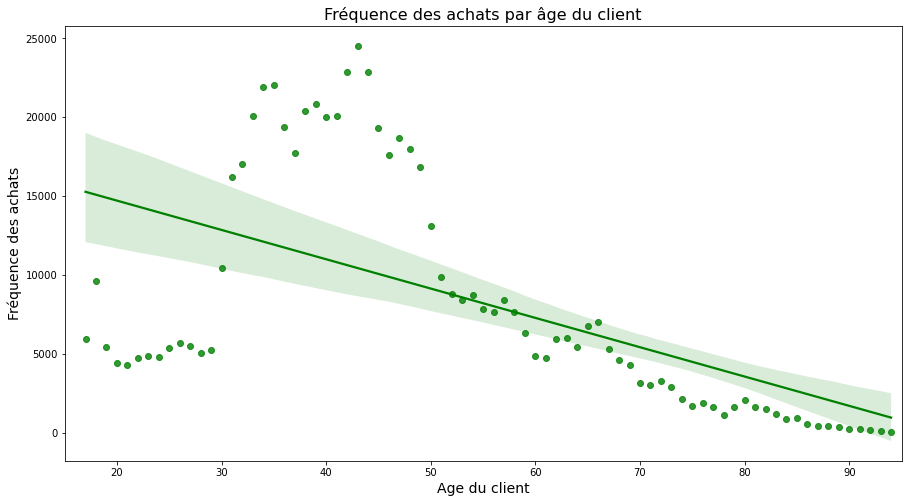

In [98]:
#Régression linéaire
plt.figure(figsize=(15, 8)) #size de la figure
sns.regplot(x='age', y="nombre d'achats par age", data = age_ca, color = 'green')#source des données et colonnes correspondantes
plt.ylabel('Fréquence des achats', fontsize= 14, color = 'black')
plt.xlabel('Age du client', fontsize= 14, color = 'black')
plt.title("Fréquence des achats par âge du client", fontsize= 16, color = 'black')
plt.xlim(15,95)# valeur min et max des abscisses

L'âge et le nombre d'achats sont des variables quantitatives continues (il peut y avoir une infinité de fréquence des achats).  
La courbe les représentant semblerait suivre une loi normale. On peut alors opérer le test paramétrique de Fisher.  
Définition de test paramétrique : test d'hypothèse supposant une forme paramétrique (sa description comme ensemble image d'une loi) des distributions relatives aux populations sous-jacentes.   
C'est le cas lorsque les populations suivent une loi normale (source : Yadolah Dodge, Statistique Dictionnaire encyclopédique, Springer, p. 567)

On peut tester si la fréquence des achats par âge du client suit une loi normale.  
Opérons un test de Kolmogorov-Smirnov.  
On émet encore une fois les deux hypothèses suivantes:  
H0: la distribution suit une loi normale  
H1: la distribution ne suit pas une loi normale  
Si la p - valeur est inférieure à 0.05, alors on retient H1.    
Source: https://openclassrooms.com/fr/courses/4525306-initiez-vous-a-la-statistique-inferentielle/5016620-decouvrez-les-tests-dadequation-le-khi-deux-et-kolmogorov-smirnov  

In [99]:
ks_2samp(age_ca["nombre d'achats par age"],list(np.random.normal(np.mean(age_ca["nombre d'achats par age"]), np.std(age_ca["nombre d'achats par age"]), 1000)))

KstestResult(statistic=0.19392307692307692, pvalue=0.007347732313349176)

Etant donné que nous avons un échantillon de petite taille (78 valeurs), on peut compléter par un test Shapiro-Wilk.

In [100]:
shapiro(age_ca["nombre d'achats par age"])
#sources : ENI, R, V. Isoz, p.574 ; PUR, R, F. Husson, p.205 à 207 ; Ellipses, R, C. Paroissin, p. 191 et 193-194. 

ShapiroResult(statistic=0.8546496629714966, pvalue=3.0578931387026387e-07)

Dans la bibliothèque Scipy, "normaltest" évalue d'adéquation à une loi normale. 

In [101]:
test1 = normaltest(age_ca["nombre d'achats par age"].dropna())
print("La p-valeur est de {:e}".format(test1[1]))
#source : PUR, Schultz et Bussonnier, p . 153.

La p-valeur est de 4.050540e-03


La p-valeur est inférieure à 0.05. A ce titre, la répartition s'éloigne de l'hypothèse initiale de la loi normale.    
La fréquence des achats par âge du client ne semble pas suivre une loi normale. 

On teste ensuite l’égalité des variances avec le test de Bartlett.  
On émet les deux hypothèses suivantes:  
H0: les variances sont égales    
H1: les variances sont inégales    
Si la p - valeur est inférieure à 0.05, alors on retient H1.  
Source : ENI, R, V. Isoz, p. 580.

In [102]:
age1 = age_ca['age']
nbage = age_ca["nombre d'achats par age"]
bartlett(age1, nbage)

BartlettResult(statistic=777.4316612134871, pvalue=4.354234822301871e-171)

La probabilité critique associée à ce test est 4.35 × 10−171, nous considérons alors que les variances sont significativement différentes.  
Source : section 5. "Tester l'égalité des variances", PUR, R, F. Husson, p. 207.

Les variances sont différentes. Cela laisse supposer une inégalité des moyennes.  
On peut tout de même tester l’égalité des moyennes (aussi appelée test de Student) pour confirmer cette logique.  
On précise dans le code que les variances sont différentes (argument : equal_var=False).  
H0: les moyennes sont égales    
H1: les moyennes sont inégales    
Si la p - valeur est inférieure à 0.05, alors on retient H1.  

In [103]:
print("La moyenne de l'âge est de : {}\nLa moyenne du nombre d'achats par âge est de : {}".\
    format(round(age1.mean(),2),round(nbage.mean(),2)))

test = ttest_ind(age1, nbage, equal_var=False)
print("La p-valeur est de {:e}".format(test[1]))
#source : PUR, Schultz et Bussonnier,  p. 157 et https://s3-eu-west-1.amazonaws.com/course.oc-static.com/courses/4525306/python_statistiques_inferentielles.html 

La moyenne de l'âge est de : 55.5
La moyenne du nombre d'achats par âge est de : 8111.4
La p-valeur est de 4.260238e-15


Les moyennes sont très significativement différentes.

In [104]:
print("La covariance est de", round(np.cov(age_ca['age'], age_ca["nombre d'achats par age"], ddof=0)[0][1],1),". Sur l'ensemble de la série statistique considérée, il y a ainsi une corrélation négative entre l'âge et la fréquence des achats.")

La covariance est de -94213.8 . Sur l'ensemble de la série statistique considérée, il y a ainsi une corrélation négative entre l'âge et la fréquence des achats.


In [105]:
age_ca[['age',"nombre d'achats par age"]].corr()

,age,nombre d'achats par age
age,1.00,-0.58
nombre d'achats par age,-0.58,1.00


In [106]:
print("Le coefficient de corrélation est de -0.58. Par conséquent, l'âge est plus faiblement corrélé à la fréquence d'achat qu'au montant des achats.")

Le coefficient de corrélation est de -0.58. Par conséquent, l'âge est plus faiblement corrélé à la fréquence d'achat qu'au montant des achats.


##### IV/-B/-2/-b/-Tranches d'âge du client et la fréquence d’achat : l'angle quantitatif et qualitatif

Segmentons davantage la clientèle via la transformation d'une variable quantitative (l'âge) en une variable qualitative (les tranches d'âge).  
Ces tranches correspondent à des qualités, des regroupements par catégories (les jeunes étudiants, les actifs occupés, les retraités, etc.).  
Opérons ensuite une ANOVA.  
L'ANOVA est une modélisation qui essaie d'expliquer les variations de la variable quantitative en fonction des modalités de la variable qualitative.  
Elle permet de calculer le rapport de corrélation, noté  η2 utile pour évaluer numériquement la corrélation.  
Source : https://openclassrooms.com/fr/courses/7410486-nettoyez-et-analysez-votre-jeu-de-donnees/7428558-analysez-une-variable-quantitative-et-une-qualitative-par-anova

In [107]:
mask = df_final['age'] < 30
df_final.loc[mask, 'classe_age'] = "ageMoins30"
mask = (df_final['age'] < 50) & (df_final['age'] >= 30)
df_final.loc[mask, 'classe_age'] = "age30_50"
mask = df_final['age'] >= 50
df_final.loc[mask, 'classe_age'] = "agePlus50"

In [108]:
#change le Dtype d'objet en category
df_final['classe_age'] = df_final['classe_age'].astype('category')

In [109]:
X = "age" # qualitative
Y = "id_transaction" # quantitative

# sous_echantillon = "moins de 30 ans"
sous_echantillon = df_final[df_final['classe_age'] == "ageMoins30"]

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
Resultat= eta_squared(sous_echantillon[X],sous_echantillon[Y])
print("Le rapport de corrélation est de",round(Resultat,4),". Ce résultat est plus proche de 0 que de 1,  les moyennes par classes sont toutes égales. Il n’y a donc pas à priori de relation entre la fréquence d'achat et la catégorie des moins de 30 ans.")

Le rapport de corrélation est de 0.0002 . Ce résultat est plus proche de 0 que de 1,  les moyennes par classes sont toutes égales. Il n’y a donc pas à priori de relation entre la fréquence d'achat et la catégorie des moins de 30 ans.


In [110]:
X = "age" # qualitative
Y = "id_transaction" # quantitative

# sous_echantillon = "age30_50"
sous_echantillon = df_final[df_final['classe_age'] == "age30_50"]

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
Resultat= eta_squared(sous_echantillon[X],sous_echantillon[Y])
print("Le rapport de corrélation est de",round(Resultat,4),". Ce résultat est plus proche de 0 que de 1,  les moyennes par classes sont toutes égales. Il n’y a donc pas à priori de relation entre la fréquence d'achat et la catégorie des 30-50 ans.")

Le rapport de corrélation est de 0.0001 . Ce résultat est plus proche de 0 que de 1,  les moyennes par classes sont toutes égales. Il n’y a donc pas à priori de relation entre la fréquence d'achat et la catégorie des 30-50 ans.


In [111]:
X = "age" # qualitative
Y = "id_transaction" # quantitative

# sous_echantillon = "plus de 50 ans"
sous_echantillon = df_final[df_final['classe_age'] == "agePlus50"]

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
Resultat= eta_squared(sous_echantillon[X],sous_echantillon[Y])
print("Le rapport de corrélation est de",round(Resultat,4),". Ce résultat est plus proche de 0 que de 1,  les moyennes par classes sont toutes égales. Il n’y a donc pas à priori de relation entre la fréquence d'achat et la catégorie des 50 ans et plus.")

Le rapport de corrélation est de 0.0002 . Ce résultat est plus proche de 0 que de 1,  les moyennes par classes sont toutes égales. Il n’y a donc pas à priori de relation entre la fréquence d'achat et la catégorie des 50 ans et plus.


Etant donné que la "fréquence des achats par âge du client" ne suit pas une loi normale, on peut ajouter un test de Kruskal.  
H0 = égalité des médianes des fréquences d'achats des tranches d'âge.  
H1 = inégalité des médianes des fréquences d'achats des tranches d'âge.  
Si la p - valeur est inférieure à 0.05, alors on retient H1.  

In [112]:
kruskal(df_final['classe_age'] == "ageMoins30", df_final['classe_age'] == "age30_50", df_final['classe_age'] == "agePlus50")
#source : https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html

KruskalResult(statistic=368627.2161143889, pvalue=0.0)

La p_valeur étant de 0, cela signifie que la fréquence des achats n'est pas distribuée de la même manière selon l'âge du client.  
Ainsi, on rejette l'hypothèse nulle d'égalité des médianes des tranches d'âge.  
L'analyse visuelle du graphique "Fréquence des achats par âge du client" confirme cette différence de distribution.   
Source : ENI, R, V. Isoz, p.581-582. 

##### IV/-B/-3/-Lien : âge du client et la taille du panier moyen

Reformulation problématisée : l’âge influence-t-il le montant de l’achat moyen ?

In [113]:
age_ca["taillePanier_moyen"] = age_ca["CA par age"] / age_ca["nombre d'achats par age"]
age_ca.head(5)

,age,nombre d'achats par age,CA par age,CA moyen par age,CA min par age,CA max par age,CA médian par age,taillePanier_moyen
0,94,23,437.77,"140,704.53",437.77,"384,592.43","135,763.73",19.03
1,93,129,"2,115.62","140,704.53",437.77,"384,592.43","135,763.73",16.40
2,92,196,"3,309.62","140,704.53",437.77,"384,592.43","135,763.73",16.89
3,91,210,"3,455.02","140,704.53",437.77,"384,592.43","135,763.73",16.45
4,90,243,"4,114.03","140,704.53",437.77,"384,592.43","135,763.73",16.93


La taille du panier moyen par âge représente des variables quantitatives et continues (il peut y avoir une infinité de valeurs).  

(15.0, 95.0)

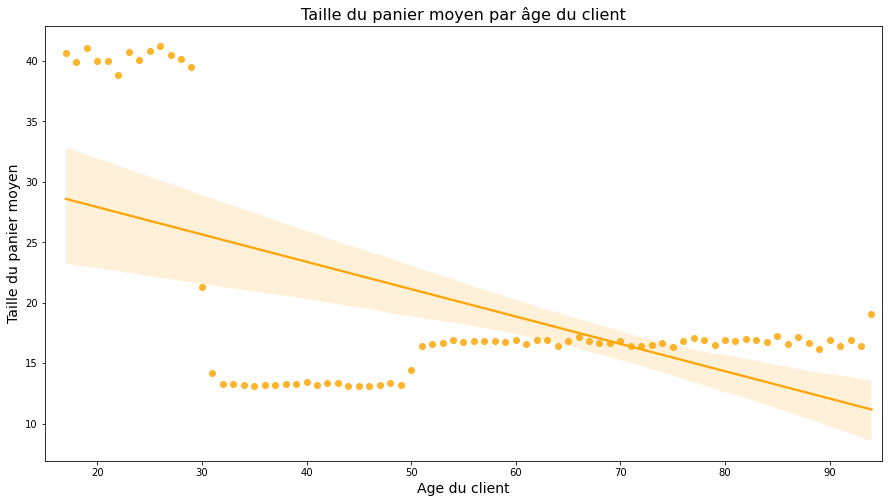

In [114]:
#Régression linéaire
plt.figure(figsize=(15, 8)) #size de la figure
sns.regplot(x='age', y="taillePanier_moyen", data = age_ca, color = 'orange')#source des données et colonnes correspondantes
plt.ylabel('Taille du panier moyen', fontsize= 14, color = 'black')
plt.xlabel('Age du client', fontsize= 14, color = 'black')
plt.title("Taille du panier moyen par âge du client", fontsize= 16, color = 'black')
plt.xlim(15,95)# valeur min et max des abscisses

In [115]:
print("La covariance est de", round(np.cov(age_ca['age'], age_ca["taillePanier_moyen"], ddof=0)[0][1],1),". Sur l'ensemble de la série statistique considérée, il y a ainsi une corrélation négative entre l'âge et la taille du panier moyen.")

La covariance est de -114.7 . Sur l'ensemble de la série statistique considérée, il y a ainsi une corrélation négative entre l'âge et la taille du panier moyen.


In [116]:
print("Le coefficient de corrélation est de",round(stats.pearsonr(age_ca['age'], age_ca["taillePanier_moyen"])[0],2),". Par conséquent, l'âge est faiblement corrélé au montant du panier moyen.")

Le coefficient de corrélation est de -0.55 . Par conséquent, l'âge est faiblement corrélé au montant du panier moyen.


D'après le graphique, les paniers moyens pourraient être segmentés sur trois groupements d'âges :  
-avant 30 ans : un panier moyen d'environ 40 euros,  
-de 30 à 50 ans : un panier moyen situé entre 10 et 15 euros,  
-à partir de 50 ans : un panier moyen situé entre 15 et 20 euros.  

##### IV/-B/-4/-Lien : âge du client et les catégories des livres achetés

Reformulation problématisée : les catégories de livres diffèrent-elles avec l'âge ou observe-t-on un panachage de différentes catégories à chaque âge ?

Nous avons une variable quantitative (âge) et une variable qualitative (catégorie) discrètes.  
Utilisons alors l'ANOVA (analyse des variances).  

In [117]:
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

result = eta_squared(df_final['categ'], df_final['age'])
print("Le rapport de corrélation est de", round(result,2) ,", les catégories achetées sont donc faiblement corrélées à l'âge.")

Le rapport de corrélation est de 0.11 , les catégories achetées sont donc faiblement corrélées à l'âge.


Observe-t-on toutefois des segments clients (avec un coefficient de corrélation plus important que celui des autres segments) qui se dégageraient pour chaque catégorie ?  

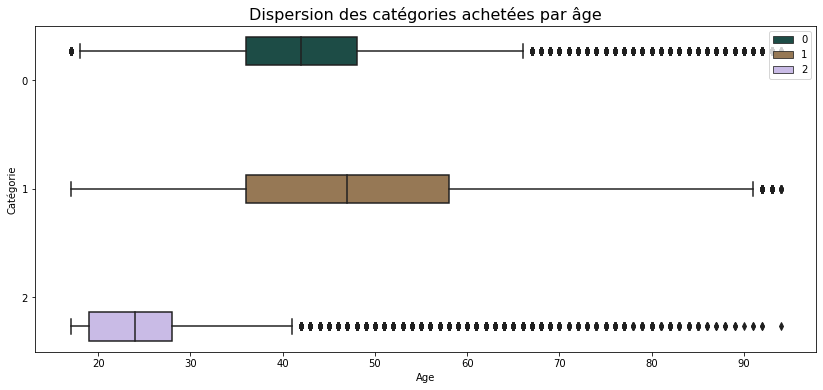

In [118]:
categories = ['catégorie 0', 'catégorie 1', 'catégorie 2']
plt.figure(figsize=(14, 6))
sns.boxplot(y="categ", x="age", data = df_final, orient='h', hue='categ', palette='cubehelix')
plt.title('Dispersion des catégories achetées par âge',fontsize= 16, color = 'black')
plt.xlabel('Age')
plt.ylabel('Catégorie')
plt.legend(loc='upper right', fontsize=10)

In [119]:
mask = df_final['age'] <= 30
df_final.loc[mask, 'age_categ'] = "ageMoins30"
mask = (df_final['age'] <= 48) & (df_final['age'] >= 35)
df_final.loc[mask, 'age_categ'] = "age35_48"

In [120]:
df_final['age_categ'] = df_final['age_categ'].astype('category')

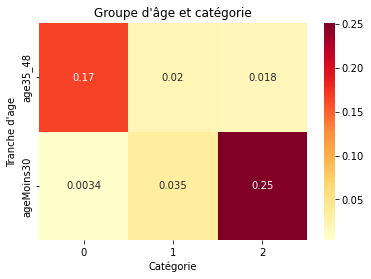

In [121]:
#heatmap

X = "age_categ"
Y = "categ"

cont = df_final[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")

tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(df_final)
indep = tx.dot(ty) / n

c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=True,cmap="YlOrRd")
plt.title("Groupe d'âge et catégorie")
plt.ylabel("Tranche d'age")
plt.xlabel("Catégorie")
plt.show()


In [122]:
mask = (df_final['age'] <= 57) & (df_final['age'] >= 35)
df_final.loc[mask, 'age_categ1'] = "age35_57"

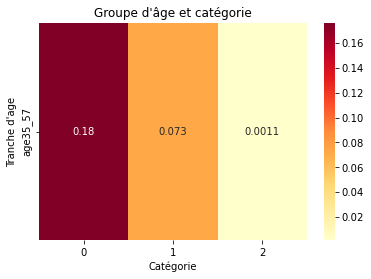

In [123]:
#heatmap
X = "age_categ1"
Y = "categ"

cont = df_final[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")

tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(df_final)
indep = tx.dot(ty) / n

c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=True,cmap="YlOrRd")
plt.title("Groupe d'âge et catégorie")
plt.ylabel("Tranche d'age")
plt.xlabel("Catégorie")
plt.show()

Au total, on identifie 3 segments clients faiblement corrélés.  

La catégorie 2 est la plus corrélée avec le segment des moins de 30 ans.  
La catégorie 0 est la plus corrélée avec les deux segments : 35-48 ans et 35-57 ans.  
La catéogorie 1 est la plus corrélée avec le segment 35-57 ans. Mais, elle l'est plus faiblement que ne l'est la catégorie 0.   

### Annexe :  

La pyramide des âges est un "facteur de confusion" dans le graphique de la demande de Julie : "Lien : âge du client et la fréquence d’achat".  
La fréquence d’achat suit la pyramide des âges.  
Autrement dit, les 30-50 n'achètent pas plus fréquemment. Ils sont simplement plus à acheter.  
Leur effectif est plus elevé que celui des moins de 30 ans ou que celui des plus de 50 ans.  

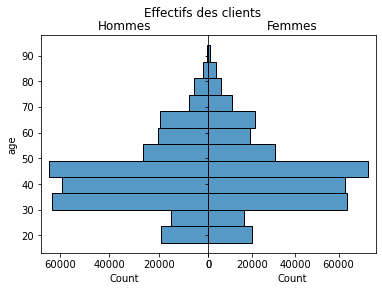

In [124]:
#La pyramide des âges ne montre aucune différence entre les hommes et les femmes.

fig, axes = plt.subplots(1, 2)
fig.suptitle('Effectifs des clients')

sns.histplot(ax=axes[0], y= df_final[df_final['sex']=='m']['age'], bins=12)
axes[0].invert_xaxis()
axes[0].set_title('Hommes')

sns.histplot(ax=axes[1], y=df_final[df_final['sex']=='f']['age'], bins=12)
axes[1].set_yticklabels([])
axes[1].set_ylabel('')
axes[1].set_title('Femmes')

plt.subplots_adjust(wspace=0, hspace=0)
plt.show()


Commentaire :  
Une pyramide des âges en forme de toupie.  
Les plus grands effectifs de clients se situent entre 30 et 50 ans.    

In [125]:
#Pour tester les variances dans la partie "Fréquence des achats par âge du client" on pourrait aussi faire le test de Levene.
#Sources : Ellipses, R, C. Paroissin, p. 178-180 ; https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html
stat, p = levene(age1, nbage)
round(p)
#La valeur nulle de 'p' suggère que l'âge et le nombre d'achats par âge n'ont pas des variances égales.

0

Sources mobilisées :  
_ENI, Langage R, V. Isoz cité "ENI, R, V. Isoz".  
_PUR, R pour la statistique et la science des données, F. Husson cité "PUR, R, F. Husson".  
_Ellipses, Programmation et analyse statistique avec R, C. Paroissin cité "Ellipses, R, C. Paroissin".   
_Springer, Statistique Dictionnaire encyclopédique, Yadolah Dodge.  
_PUR, Python pour les SHS, Schultz et Bussonnier cité "PUR, Schultz et Bussonnier".  
_O'reilly, Analyse de données avec Python, Wes McKinney cité "McKinney".   
_Et autres sources web.